# Poligonok



In [1]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import shapely
import matplotlib.pyplot as plt
import random
import numpy as np

w = 0.5
h = 5
f = 10
polygon = Polygon([(-f, -h), (-f+w, -h), (-f+w, h-w), (f+w, h-w), (f+w, -h), (f+2*w, -h), (f+2*w, h), (-f, h)])
x,y = polygon.exterior.xy
plt.plot(x, y, "k*--")
plt.show()

<Figure size 640x480 with 1 Axes>

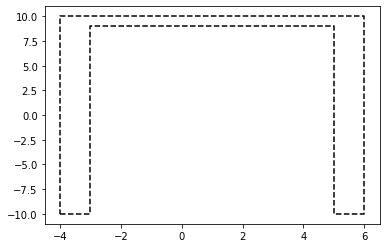

In [2]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt
import random

w = 1
h = 10
f = 4
polygon = Polygon([(-f, -h), (-f+w, -h), (-f+w, h-w), (f+w, h-w), (f+w, -h), (f+2*w, -h), (f+2*w, h), (-f, h)])
x,y = polygon.exterior.xy
plt.plot(x, y, "k--")
plt.show()

False


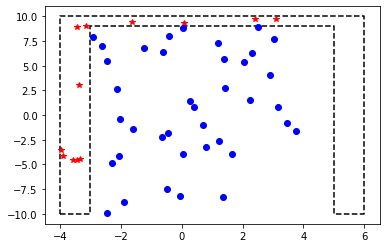

In [3]:
plt.plot(x, y, "k--")
for _ in range(50):
    point = Point(random.uniform(-4,4), random.uniform(-10,10))
    if polygon.contains(point):
        plt.plot(point.x, point.y, "r*")
    else:
        plt.plot(point.x, point.y, "bo")
print(polygon.contains(point))
plt.show()

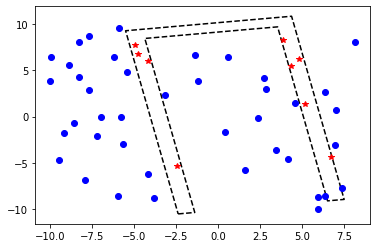

In [4]:
rot = np.pi / 20
t = np.array([[np.cos(rot), np.sin(rot)], [-np.sin(rot), np.cos(rot)]])
a = np.dot(np.transpose([x,y]), t)
polygon_r = Polygon(a)
x_r,y_r = polygon_r.exterior.xy
plt.plot(x_r, y_r, "k--")
for _ in range(50):
    point = Point(random.uniform(-10,10), random.uniform(-10,10))
    if polygon_r.contains(point):
        plt.plot(point.x, point.y, "r*")
    else:
        plt.plot(point.x, point.y, "bo")
plt.show()

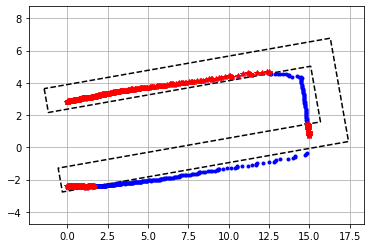

In [5]:
# x, y, width, height, tolerance (margin width), rotation(deg!)
def create_polygon(x, y, w, h, t, rot):
    polygon = Polygon([(-w/2-t/2, -h/2), (-w/2+t/2, -h/2), (-w/2+t/2, h/2-t), (w/2-t/2, h/2-t), (w/2-t/2, -h/2), (w/2+t/2, -h/2), (w/2+t/2, h/2), (-w/2-t/2, h/2)])
    polygon = shapely.affinity.rotate(polygon, rot)
    polygon = shapely.affinity.translate(polygon, x, y)
    return polygon

polygon = create_polygon(8, 2, 5, 18, 1.5, -80)
x,y = polygon.exterior.xy
plt.plot(x, y, "k--")
xy = np.loadtxt("data/scan07.csv", delimiter=",")
plt.axis('equal')
plt.plot(xy[:,0], xy[:,1], "b.")
for p in xy:
    point = Point(p[0], p[1])
    if polygon.contains(point):
        plt.plot(point.x, point.y, "r*")
plt.grid()
plt.show()

New best fitted: 132
New best fitted: 147
New best fitted: 170
New best fitted: 311
New best fitted: 387
Elapsed time:  0.9879753589630127


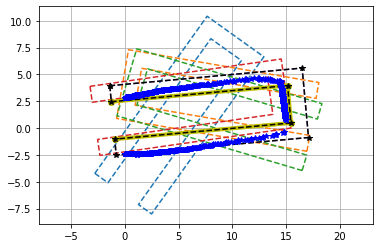

In [6]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import shapely
import matplotlib.pyplot as plt
import random
import numpy as np
import time

class ParkingPoly:
    polygon = None
    # x, y, width, height, tolerance (margin width), rotation(deg!)
    def __init__(self, x, y, w, h, t, rot):
        self.polygon = Polygon([(-w/2-t/2, -h/2), (-w/2+t/2, -h/2), (-w/2+t/2, h/2-t), (w/2-t/2, h/2-t), (w/2-t/2, -h/2), (w/2+t/2, -h/2), (w/2+t/2, h/2), (-w/2-t/2, h/2)])
        self.polygon = shapely.affinity.rotate(self.polygon, rot)
        self.polygon = shapely.affinity.translate(self.polygon, x, y)
    def getCentroid(self):
        return self.polygon.centroid.coords[0]
    def getLines(self):
        # 2 lines, 4 points
        l = self.polygon.exterior.coords[1:5]
        l = np.asarray(l)
        return l
    def plotLines(self):
        lxy = self.getLines()
        plt.plot(lxy[:, 0], lxy[:, 1], "yo-", linewidth = 4)
    def plot(self, style = "--"):
        x,y = self.polygon.exterior.xy
        plt.plot(x, y, style)
    def pointsInside(self, xy):
        inside = 0
        for p in xy:
            point = Point(p[0], p[1])
            if self.polygon.contains(point):
                inside += 1
        return inside


lscan = np.loadtxt("data/scan07.csv", delimiter=",")
best = 0
start = time.time()
for i in range(30):
    x = random.uniform(5,9) # x between 5m and 9m
    y = random.uniform(1,3)
    r = random.uniform(-90, 90) # rotation between 90 ang -90 deg
    rand_poly = ParkingPoly(x, y, 5, 18, 1.5, r)
    inside = rand_poly.pointsInside(lscan)
    if inside > best: 
        print("New best fitted:", inside)
        best = inside
        best_poly = rand_poly
        rand_poly.plot()
        if best > 700:
            break
end = time.time()
print("Elapsed time: ", end - start)
best_poly.plotLines()
best_poly.plot("k*--")
plt.axis("equal")
plt.plot(lscan[:,0], lscan[:,1], "b*")
plt.grid()
plt.show()